<h1>Assignment: Predicting 2024 Data Science Salaries Using Linear Regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Datasets//Data Science Salary 2021 to 2023.csv')

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


<h2>🔍 Part 2: Exploratory Data Analysis (EDA)

<h3>1. How many unique job titles are there?

In [3]:
df['job_title'].nunique()


93

<h3>2. What is the average salary (`salary_in_usd`) per `work_year`?</h2>

In [5]:
avg_salary_per_year = df.groupby('work_year')['salary_in_usd'].mean()
print(avg_salary_per_year)

work_year
2020     92302.631579
2021     94087.208696
2022    133379.510804
2023    148954.558413
Name: salary_in_usd, dtype: float64


<h2> 3. Create a bar plot showing average salary by `experience_level`.

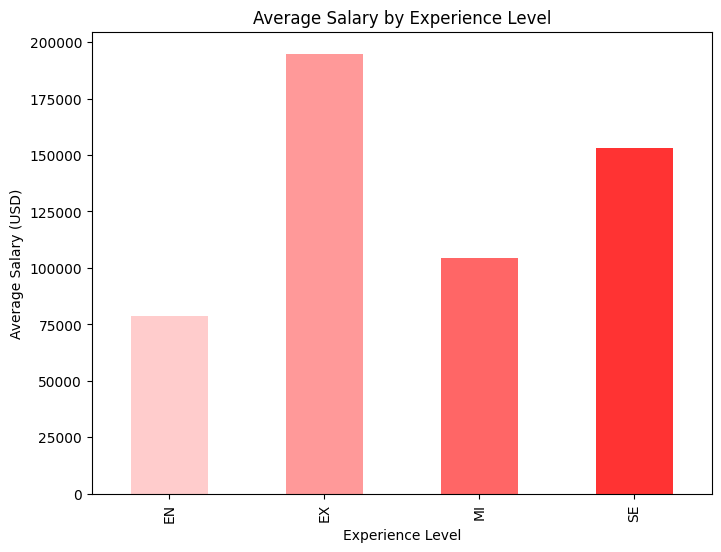

In [6]:
experience_lvl = df.groupby('experience_level')['salary_in_usd'].mean()

red_shades = ['#FFCCCC', '#FF9999', '#FF6666', '#FF3333', '#CC0000']

experience_lvl.plot(kind='bar', color=red_shades, figsize=(8,6))
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.show()


<h3>
Part 3: Data Preprocessing for linear Regression
We will predict `salary_in_usd` using **only numerical or encoded categorical features**.
<h3>Steps:
<h3>1. Select features: work_year, experience_level, and optionally job_title (you decide!)
<h3>2. Encode categorical variables (experience_level) using LabelEncoder or pd.get_dummies()
<h3>3. Define X (features) and y (target = salary_in_usd)</h3>
<h3>⚠️ Important: Do NOT include salary, salary_currency, or salary_in_usd in your features!

In [7]:
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

features = ['work_year', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']

X.head()

,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


<h3>
Part 4: Train a Linear Regression Model</h3>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


<h3> Part 5: Predict 2024 Salaries

In [9]:
future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3] 
})

predicted_salaries = model.predict(future_data)

results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


<h2>Part 6: Reflection (Answer in a Markdown Cell)

In [ ]:
1. Does your model make reasonable predictions? Why or why not?
Yes, The model gives somewhat reasonable predictions, but only to a limited extent. Since it was trained using very few features, it can capture general trends but may miss important patterns. Without strong predictors, the model’s output might look reasonable on paper but not truly accurate when applied to real-world data.

2. What are the limitations of using only work_year and experience_level?
Because salary also relies on employment position, skills, firm, and location, these two characteristics do not fully capture the picture..

3. How could you improve this model?
I could include more features, like job title or country, use better ways to encode the data, and try more advanced models that can capture non-linear patterns.

4. Why is R² not enough to trust your predictions?
R2 just shows how well the model fits the data; it does not suggest that the predictions are accurate or reliable for novel circumstances.